<a href="https://colab.research.google.com/github/spradeepgit/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
 # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# CSV file loaction path
file_path= '/content/drive/MyDrive/Almabetter csv files/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [5]:
# importing csv file into Pandas dataframe.
netflix_df=pd.read_csv(file_path)

In [6]:
# first 5 rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [8]:
# lets check the total rows and columns
netflix_df.shape

(7787, 12)

In [9]:
# shows the datatypes of columns
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [11]:
#lets check the missing values in the row
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64



### *   **Here we seen that columns which have missing values are:**
*   director
*   cast
*   rating
*   country
*   date_added




*   List item



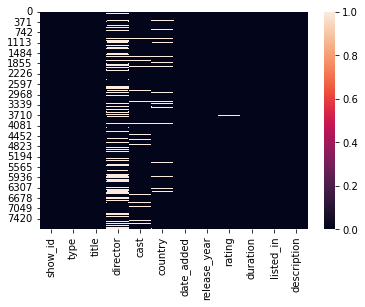

In [12]:
# lets show some visulization on null values
sns.heatmap(netflix_df.isnull())

## **Handling Missing Values**

In [13]:
netflix_df.fillna({'rating':'Unavailable', 'director':'Unavailable', 'cast':'Unavailable','country': 'Unavailable','date_added':'Unaavilable'},inplace=True)
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

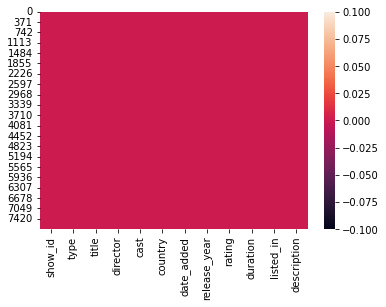

In [14]:
sns.heatmap(netflix_df.isnull())

## **Univariate Analysis by code & Visualizations:**

In [15]:
#look at type of shows that has been watch on netflix
netflix_df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count vs type of shows')

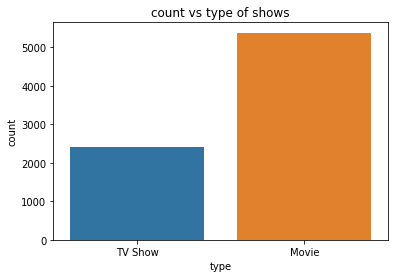

In [16]:
# countplot helps us to plot counts of each category 
sns.countplot(netflix_df['type'])
plt.title('count vs type of shows')

In [17]:
netflix_df['country'].value_counts().head(10)

United States     2555
India              923
Unavailable        507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: country, dtype: int64

Text(0.5, 1.0, 'Contry Wise Content on Netflix')

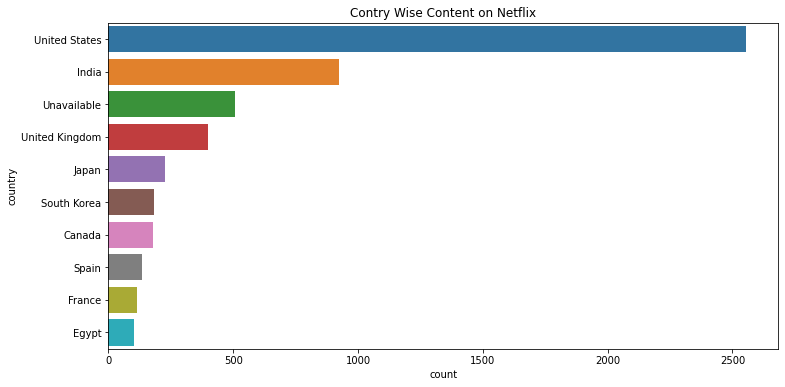

In [18]:
# Visualize the country column 
plt.figure(figsize=(12,6))
sns.countplot(y='country',order= netflix_df['country'].value_counts().index[0:10],data=netflix_df)
plt.title('Contry Wise Content on Netflix')

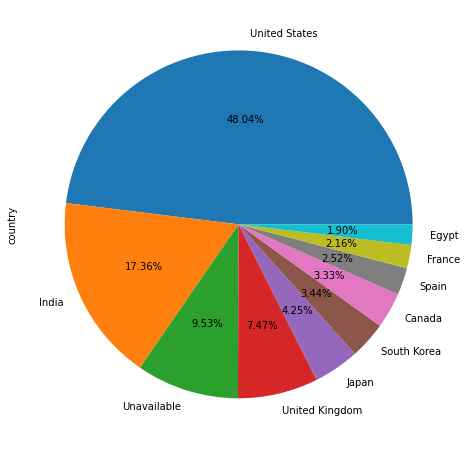

In [46]:
# top 10 countries which produced movies/shows on Netflix 
plt.figure(figsize=(15,8))
netflix_df['country'].value_counts()[:10].plot(kind='pie',autopct = "%0.2f%%")

In [38]:
# Now check type of content based on countries
movie_country=netflix_df[netflix_df['type']=='Movie']
tv_show_country=netflix_df[netflix_df['type']=='TV Show']

Text(0.5, 1.0, 'Top 10 Contries producing movie in Netflix')

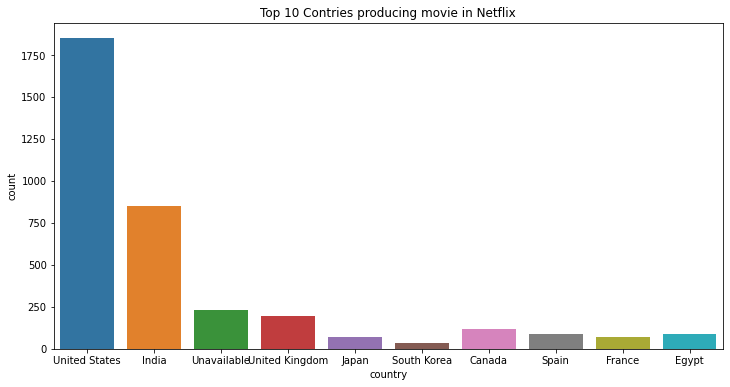

In [48]:
# Visualize the top 10 countries producing movies on Netflix  
plt.figure(figsize=(12,6))
sns.countplot(x='country',order= netflix_df['country'].value_counts().index[0:10],data=movie_country,orient="h")
plt.title('Top 10 Contries producing movie in Netflix')

Text(0.5, 1.0, 'Top 10 Contries producing tv shows in Netflix')

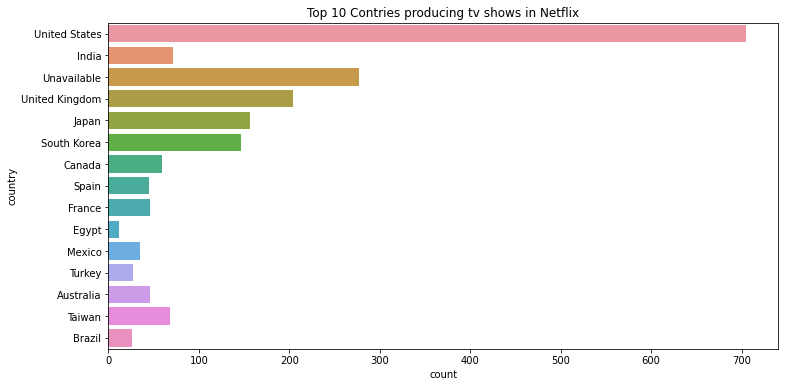

In [49]:
# Visualize the country column 
plt.figure(figsize=(12,6))
sns.countplot(y='country',order= netflix_df['country'].value_counts().index[0:15],data=tv_show_country,orient="h")
plt.title('Top 10 Contries producing tv shows in Netflix')

### Lets check what are the major ratings given to Netflix Shows 

In [52]:
netflix_df.rating.value_counts().reset_index()

,index,rating
0,TV-MA,2863
1,TV-14,1931
2,TV-PG,806
3,R,665
4,PG-13,386
5,TV-Y,280
6,TV-Y7,271
7,PG,247
8,TV-G,194
9,NR,84


Text(0.5, 1.0, 'Ratings of shows in Netflix VS Count')

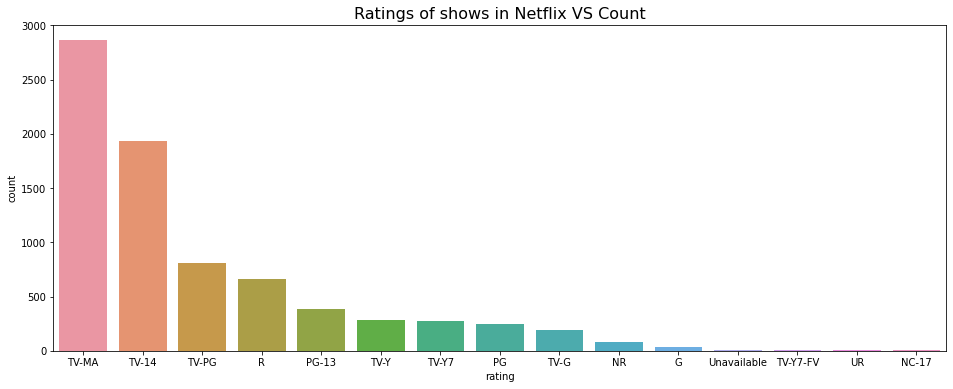

In [53]:
# Visualize the country column 
plt.figure(figsize=(16,6))
sns.countplot(x='rating',order= netflix_df['rating'].value_counts().index[0:15],data=netflix_df,orient="h")
plt.title('Ratings of shows in Netflix VS Count',size=16)

### As we seen that Highest ratings of show is TV-MA
### and lowest rating of show is NC-17



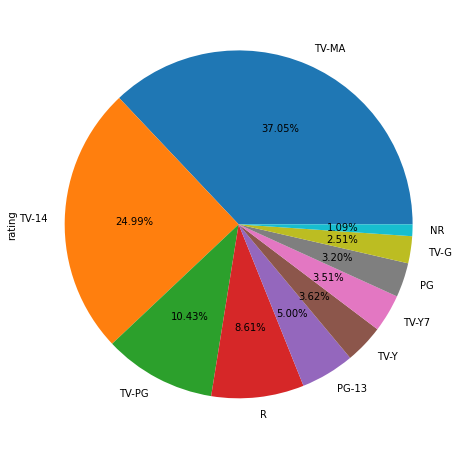

In [60]:
# percentage 'rarting' of shows 
plt.figure(figsize=(15,8))
netflix_df['rating'].value_counts()[:10].plot(kind='pie',autopct = "%0.2f%%")

## **Lets check the release year**

In [54]:
netflix_df.release_year.value_counts()[:20].reset_index()

,index,release_year
0,2018,1121
1,2017,1012
2,2019,996
3,2016,882
4,2020,868
5,2015,541
6,2014,334
7,2013,267
8,2012,219
9,2010,173


Text(0.5, 1.0, 'Content Release in Years on Netflix vs count')

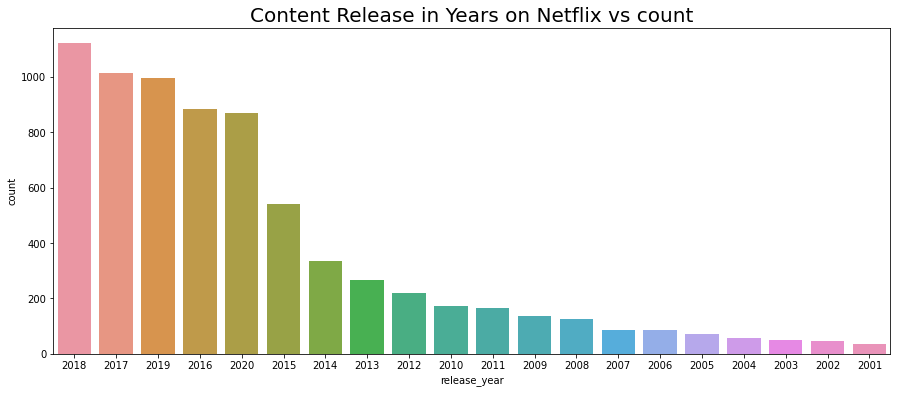

In [55]:
plt.figure(figsize=(15,6))
sns.countplot(x='release_year',order=netflix_df['release_year'].value_counts().index[:20],data=netflix_df)
plt.title('Content Release in Years on Netflix vs count',size=20)

**So the Maximum content release on netflix is 2018**

**and the minimum content release on netflix is 2001**

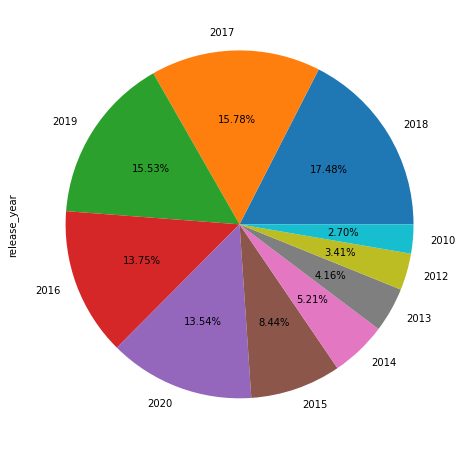

In [63]:
plt.figure(figsize=(15,8))
netflix_df['release_year'].value_counts()[:10].plot(kind='pie',autopct = "%0.2f%%")

### **In the Top 10 releasing year of movies/shows on Netflix is**

So the Maximum percetage content release on netflix in 2018 is 17.48
and the minimum percentage content release on netflix in 2010 is 2.70

### **Analysis of Populer Genres on Netflix**

In [56]:
netflix_df.listed_in.value_counts()[:20]

Documentaries                                        334
Stand-Up Comedy                                      321
Dramas, International Movies                         320
Comedies, Dramas, International Movies               243
Dramas, Independent Movies, International Movies     215
Kids' TV                                             205
Children & Family Movies                             177
Documentaries, International Movies                  172
Children & Family Movies, Comedies                   169
Comedies, International Movies                       161
Dramas, International Movies, Romantic Movies        153
Comedies, International Movies, Romantic Movies      139
Dramas                                               117
Action & Adventure, Dramas, International Movies     117
International TV Shows, TV Dramas                    111
Dramas, International Movies, Thrillers              109
Crime TV Shows, International TV Shows, TV Dramas    106
Comedies, Dramas, Independent M

Text(0.5, 1.0, 'Genere of movie and show Release on Netflix vs count')

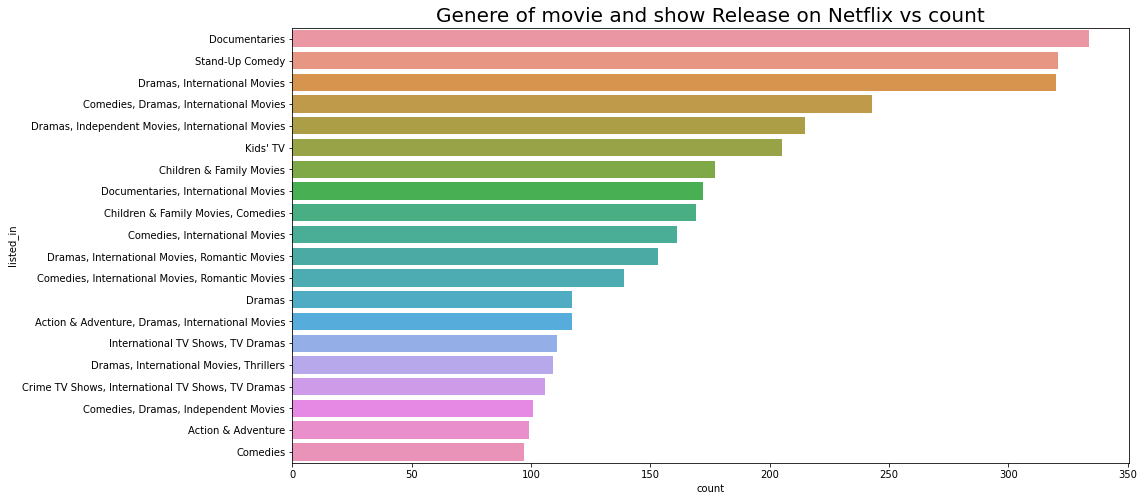

In [57]:
plt.figure(figsize=(15,8))
sns.countplot(y='listed_in',order=netflix_df['listed_in'].value_counts().index[:20],data=netflix_df)
plt.title('Genere of movie and show Release on Netflix vs count',size=20)

### **In the top 10 Geners**, The Highest level of Genere release in Netflix is **Documentaries**
### and the lowest level of Genere release on Netflix is **Comedies**

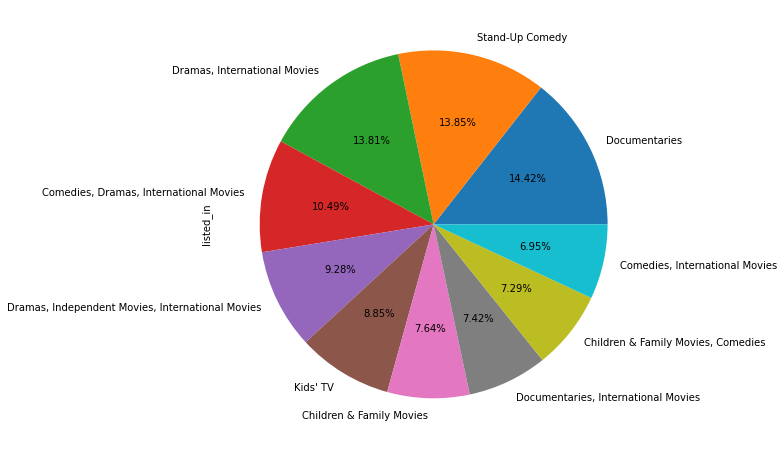

In [66]:
# Lets check the percentage genere of Movie and shows on Netflix
plt.figure(figsize=(15,8))
netflix_df['listed_in'].value_counts()[:10].plot(kind='pie',autopct = "%0.2f%%")

**In the top 10 Geners,** The Highest percetage level of Genere is **Documentaries which is 14.42%** 

and the lowest percentage level of Genere is **Comedies, International Movies is 6.95%**

## **Lets Analyse Bivariate and Multivariate Analysis**

In [67]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [99]:
netflix_df.release_year.value_counts()[:10].reset_index()

,index,release_year
0,2018,1121
1,2017,1012
2,2019,996
3,2016,882
4,2020,868
5,2015,541
6,2014,334
7,2013,267
8,2012,219
9,2010,173


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


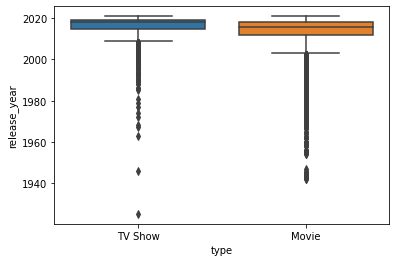

In [84]:
sns.boxplot(netflix_df['type'],netflix_df['release_year'],orient='v')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


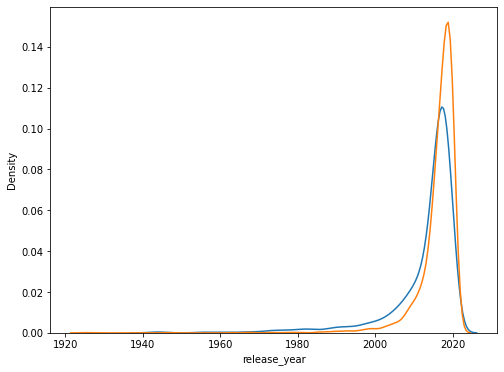

In [125]:
plt.figure(figsize=(8,6))
sns.distplot(netflix_df[netflix_df['type']=='Movie']['release_year'],hist=False)       # Blue hist shows the Movies
sns.distplot(netflix_df[netflix_df['type']=='TV Show']['release_year'],hist=False)     # Orange hist shows the TV Shows

### **So here we clearly say that the maximum production of TV Shows is Between of year 2000 to 2020**
### **and the production of TV Shows is greater than Movies in years 2000 to 2020**

In [135]:
netflix_df.country.value_counts()[:6]

United States     2555
India              923
Unavailable        507
United Kingdom     397
Japan              226
South Korea        183
Name: country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

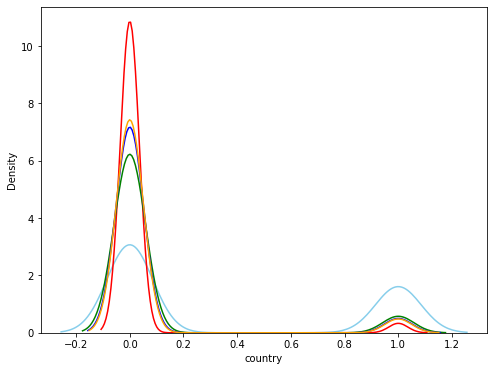

In [166]:
plt.figure(figsize=(8,6))
sns.distplot(netflix_df[netflix_df['type']=='Movie']['country']=='United States',hist=False,color='skyblue')     
sns.distplot(netflix_df[netflix_df['type']=='TV Show']['country']=='India',hist=False,color='red')             
sns.distplot(netflix_df[netflix_df['type']=='TV Show']['country']=='United Kingdom',hist=False,color='green')
sns.distplot(netflix_df[netflix_df['type']=='TV Show']['country']=='Japan',hist=False,color='blue')
sns.distplot(netflix_df[netflix_df['type']=='TV Show']['country']=='South Korea',hist=False,color='orange')

In [145]:
netflix_df.country.value_counts()

United States                                                   2555
India                                                            923
Unavailable                                                      507
United Kingdom                                                   397
Japan                                                            226
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [149]:
netflix_df.rating.value_counts()

TV-MA          2863
TV-14          1931
TV-PG           806
R               665
PG-13           386
TV-Y            280
TV-Y7           271
PG              247
TV-G            194
NR               84
G                39
Unavailable       7
TV-Y7-FV          6
UR                5
NC-17             3
Name: rating, dtype: int64

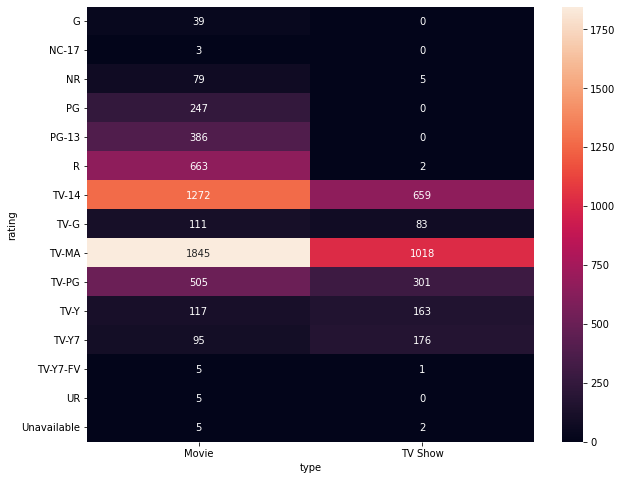

In [173]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(netflix_df['rating'],netflix_df['type']),annot=True,fmt='d')
xlabel='country'

## **CONCLUSIONS AND SUMMARY**:

## **So we had perform lot of operations over the dataset to dig out some very useful information from it. if we have to conclude the dataset in few lines then we can say that:**


*    **Netflix has more movies han tv shows**
*    **Most number of Movies and tv Shows are produced by United States, followed by india who has produced the seconfd most number of Movies on Netflix**
*    **Most of the content on Netflix(Movies and TV Shows combine) is for Mature Audience**
*    **2018 is the Year in which Netflix released lot more content to other Years** 
*    **International Movies and Dramas are the most popular Genere on Netflix**




